In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Path to the Validation Data folder
validation_data_folder = '/content/drive/MyDrive/work2/Validation_Data/Meta_Data'

# List of CSV files in the Validation Data folder
csv_files = [file for file in os.listdir(validation_data_folder) if file.endswith('.csv')]

# Function to generate statistics for a given DataFrame
def generate_stats(df):
    stats = {
        'Number of Entries': len(df),
        'Number of Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicated Rows': df.duplicated().sum()
    }
    return stats

# Dictionary to hold statistics for each CSV file
stats_dict = {}

# Generate statistics for each CSV file
for csv_file in csv_files:
    file_path = os.path.join(validation_data_folder, csv_file)
    df = pd.read_csv(file_path)
    stats_dict[csv_file] = generate_stats(df)

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index')

# Display the statistics
print(stats_df)

# Save the statistics to a CSV file
stats_output_path = '/content/drive/MyDrive/work2/Validation_Data/Validation_Data_Stats.csv'
stats_df.to_csv(stats_output_path)

print(f"Statistics saved to {stats_output_path}")


                      Number of Entries  Number of Columns  \
Videos.csv                           29                  2   
Text.csv                             29                 12   
Frames_Meta_Data.csv               2025                  9   
Audio.csv                            29                 10   

                                                           Column Names  \
Videos.csv                                                [File, Senti]   
Text.csv              [File, Transcription, Status, Length, WordCoun...   
Frames_Meta_Data.csv  [Video Name, Frame Path, Time in Seconds, Key_...   
Audio.csv             [File, Transcription, Status, Length, WordCoun...   

                      Missing Values  Duplicated Rows  
Videos.csv                         0                0  
Text.csv                           0                0  
Frames_Meta_Data.csv               0                0  
Audio.csv                          0                0  
Statistics saved to /content/driv

In [ ]:

import pandas as pd
# Load the statistics DataFrame
stats_df = pd.read_csv('/content/drive/MyDrive/work2/Validation_Data/Validation_Data_Stats.csv', index_col=0)

# Show the first 20 rows of the DataFrame
stats_df.head(20)


,Number of Entries,Number of Columns,Column Names,Missing Values,Duplicated Rows
Videos.csv,29,2,"['File', 'Senti']",0,0
Text.csv,29,12,"['File', 'Transcription', 'Status', 'Length', ...",0,0
Frames_Meta_Data.csv,2025,9,"['Video Name', 'Frame Path', 'Time in Seconds'...",0,0
Audio.csv,29,10,"['File', 'Transcription', 'Status', 'Length', ...",0,0


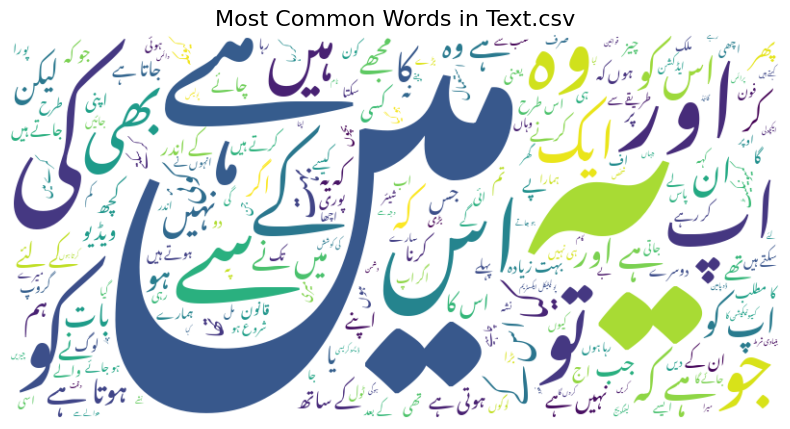

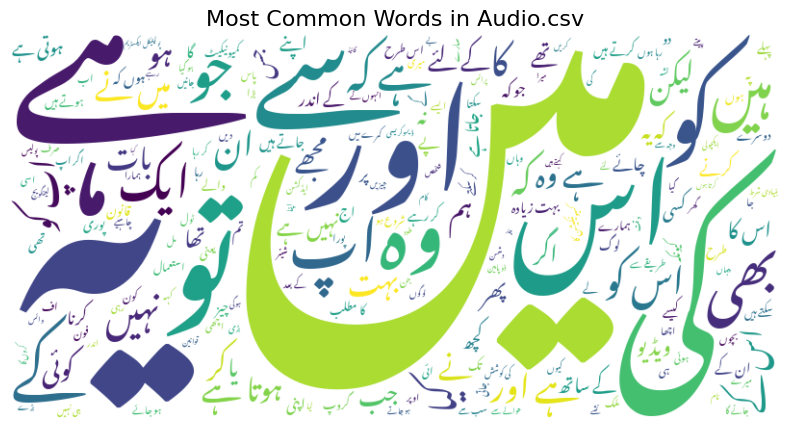

                      Number of Entries  Number of Columns  \
Videos.csv                           29                  2   
Text.csv                             29                 12   
Frames_Meta_Data.csv               2025                  9   
Audio.csv                            29                 10   

                                                           Column Names  \
Videos.csv                                                [File, Senti]   
Text.csv              [File, Transcription, Status, Length, WordCoun...   
Frames_Meta_Data.csv  [Video Name, Frame Path, Time in Seconds, Key_...   
Audio.csv             [File, Transcription, Status, Length, WordCoun...   

                      Missing Values  Duplicated Rows  
Videos.csv                         0                0  
Text.csv                           0                0  
Frames_Meta_Data.csv               0                0  
Audio.csv                          0                0  
Statistics saved to /content/driv

In [ ]:
import os
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

# Path to the Validation Data folder
validation_data_folder = '/content/drive/MyDrive/work2/Validation_Data/Meta_Data'

# List of CSV files to specifically process for word clouds
target_files = ['Text.csv', 'Audio.csv']

# Path to the already downloaded Nastaleeq font
font_path = '/content/NotoNastaliqUrdu-Regular.ttf'

# Download the Noto Nastaliq Urdu font if not already available
if not os.path.exists(font_path):
    font_url = 'https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoNastaliqUrdu/NotoNastaliqUrdu-Regular.ttf?raw=true'
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded Noto Nastaliq Urdu font to {font_path}")

# Function to generate statistics for a given DataFrame
def generate_stats(df):
    stats = {
        'Number of Entries': len(df),
        'Number of Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicated Rows': df.duplicated().sum()
    }
    return stats

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    words = text.split()
    return words

# Function to generate word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Dictionary to hold statistics for each CSV file
stats_dict = {}

# Dictionary to hold unique words and their frequencies for each target CSV file
unique_words_dict = {}

# Process each CSV file
for csv_file in os.listdir(validation_data_folder):
    if csv_file.endswith('.csv'):
        file_path = os.path.join(validation_data_folder, csv_file)
        df = pd.read_csv(file_path)
        stats_dict[csv_file] = generate_stats(df)

        if csv_file in target_files:
            # Analyze the 'Transcription' column for unique words and their frequencies
            all_words = []
            df['Transcription'] = df['Transcription'].astype(str)
            df['Transcription'] = df['Transcription'].apply(clean_and_tokenize)
            for words in df['Transcription']:
                all_words.extend(words)

            word_counts = Counter(all_words)
            unique_words_dict[csv_file] = word_counts.most_common()

            # Generate word cloud for the most common words
            generate_wordcloud(all_words, f"Most Common Words in {csv_file}")

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index')

# Display the statistics
print(stats_df)

# Save the statistics to a CSV file
stats_output_path = '/content/drive/MyDrive/work2/Validation_Data/Validation_Data_Stats.csv'
stats_df.to_csv(stats_output_path)

print(f"Statistics saved to {stats_output_path}")

# Save unique words statistics to a CSV file
unique_words_df = pd.DataFrame.from_dict(unique_words_dict, orient='index').transpose()
unique_words_output_path = '/content/drive/MyDrive/work2/Validation_Data/Unique_Words_Stats.csv'
unique_words_df.to_csv(unique_words_output_path, index=False)

print(f"Unique words statistics saved to {unique_words_output_path}")


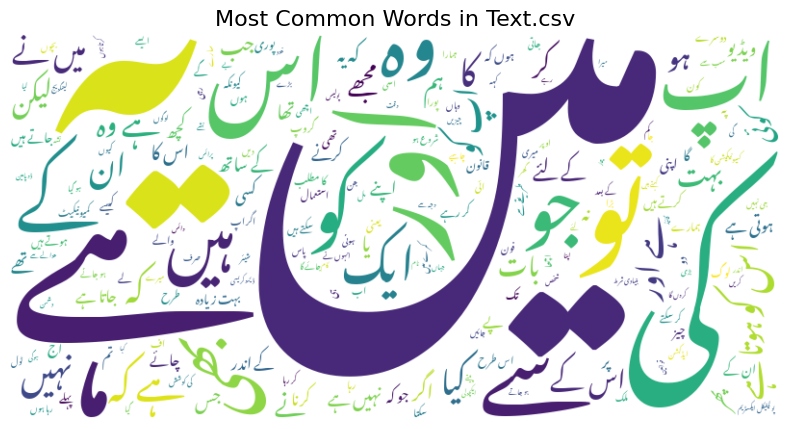

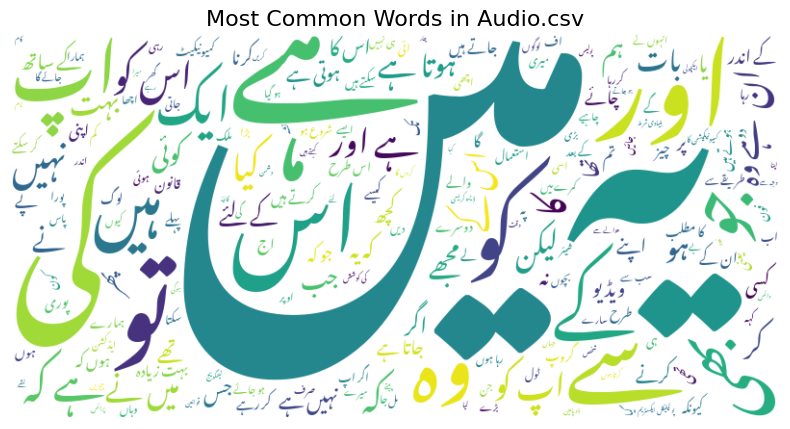

                      Number of Entries  Number of Columns  \
Videos.csv                           29                  2   
Text.csv                             29                 12   
Frames_Meta_Data.csv               2025                  9   
Audio.csv                            29                 10   

                                                           Column Names  \
Videos.csv                                                [File, Senti]   
Text.csv              [File, Transcription, Status, Length, WordCoun...   
Frames_Meta_Data.csv  [Video Name, Frame Path, Time in Seconds, Key_...   
Audio.csv             [File, Transcription, Status, Length, WordCoun...   

                      Missing Values  Duplicated Rows  \
Videos.csv                         0                0   
Text.csv                           0                0   
Frames_Meta_Data.csv               0                0   
Audio.csv                          0                0   

                           

In [ ]:
import os
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

# Path to the Validation Data folder
validation_data_folder = '/content/drive/MyDrive/work2/Validation_Data/Meta_Data'

# List of CSV files to specifically process for word clouds
target_files = ['Text.csv', 'Audio.csv']

# Path to the already downloaded Nastaliq font
font_path = '/content/NotoNastaliqUrdu-Regular.ttf'

# Download the Noto Nastaliq Urdu font if not already available
if not os.path.exists(font_path):
    font_url = 'https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoNastaliqUrdu/NotoNastaliqUrdu-Regular.ttf?raw=true'
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded Noto Nastaliq Urdu font to {font_path}")

# Function to generate basic statistics for a given DataFrame
def generate_basic_stats(df):
    stats = {
        'Number of Entries': len(df),
        'Number of Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicated Rows': df.duplicated().sum()
    }
    return stats

# Function to generate detailed statistics for a given DataFrame
def generate_detailed_stats(df):
    detailed_stats = df.describe(include='all').transpose().to_dict()
    detailed_stats['unique_value_counts'] = {col: df[col].nunique() for col in df.columns}
    return detailed_stats

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    words = text.split()
    return words

# Function to generate word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Dictionary to hold statistics for each CSV file
stats_dict = {}

# Dictionary to hold unique words and their frequencies for each target CSV file
unique_words_dict = {}

# Process each CSV file
for csv_file in os.listdir(validation_data_folder):
    if csv_file.endswith('.csv'):
        file_path = os.path.join(validation_data_folder, csv_file)
        df = pd.read_csv(file_path)
        basic_stats = generate_basic_stats(df)
        detailed_stats = generate_detailed_stats(df)
        stats_dict[csv_file] = {**basic_stats, **detailed_stats}

        if csv_file in target_files:
            # Analyze the 'Transcription' column for unique words and their frequencies
            all_words = []
            df['Transcription'] = df['Transcription'].astype(str)
            df['Transcription'] = df['Transcription'].apply(clean_and_tokenize)
            for words in df['Transcription']:
                all_words.extend(words)

            word_counts = Counter(all_words)
            unique_words_dict[csv_file] = word_counts.most_common()

            # Generate word cloud for the most common words
            generate_wordcloud(all_words, f"Most Common Words in {csv_file}")

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index')

# Display the statistics
print(stats_df)

# Save the statistics to a CSV file
stats_output_path = '/content/drive/MyDrive/work2/Validation_Data/Validation_Data_Stats.csv'
stats_df.to_csv(stats_output_path)

print(f"Statistics saved to {stats_output_path}")

# Save unique words statistics to a CSV file
unique_words_df = pd.DataFrame.from_dict(unique_words_dict, orient='index').transpose()
unique_words_output_path = '/content/drive/MyDrive/work2/Validation_Data/Unique_Words_Stats.csv'
unique_words_df.to_csv(unique_words_output_path, index=False)

print(f"Unique words statistics saved to {unique_words_output_path}")


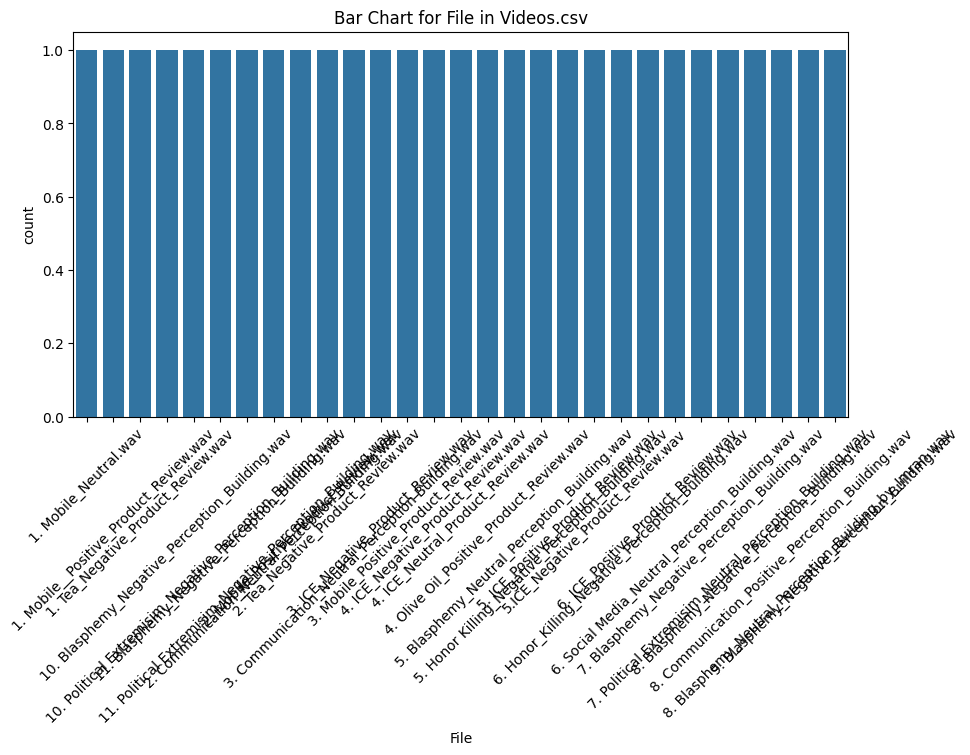

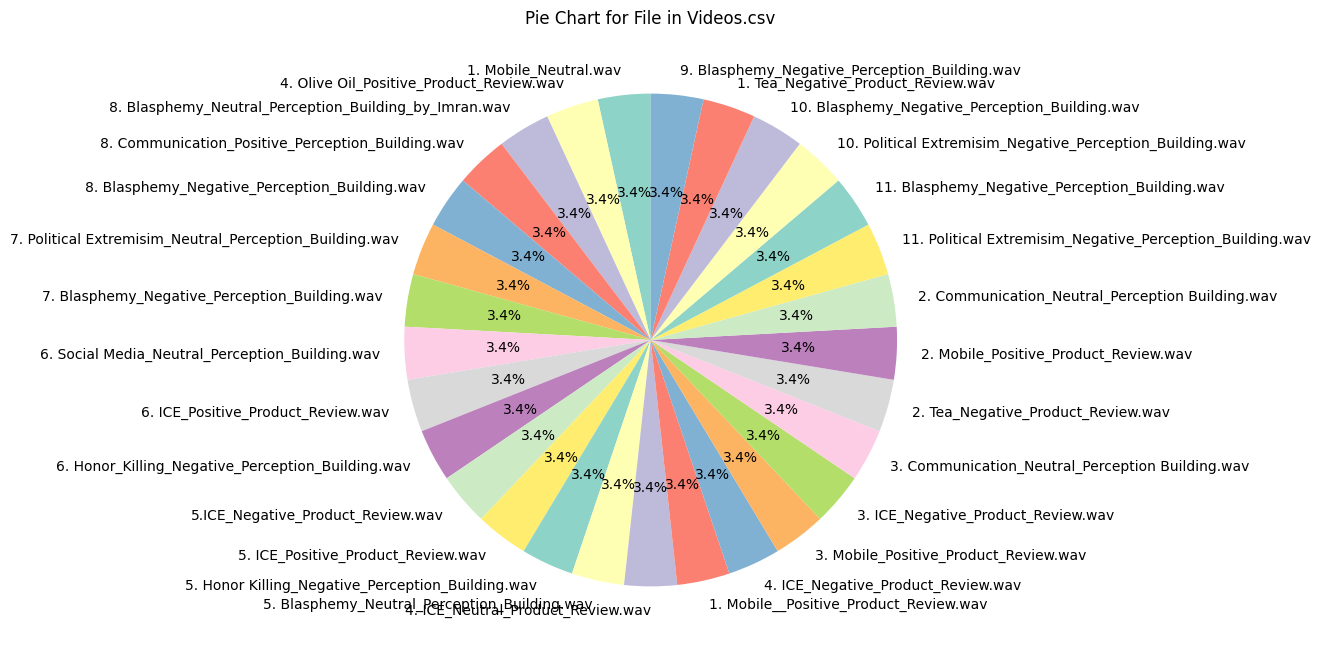

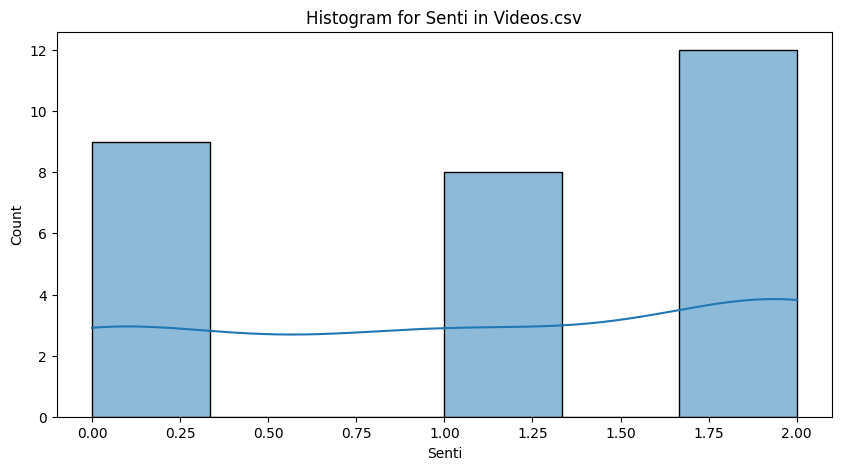

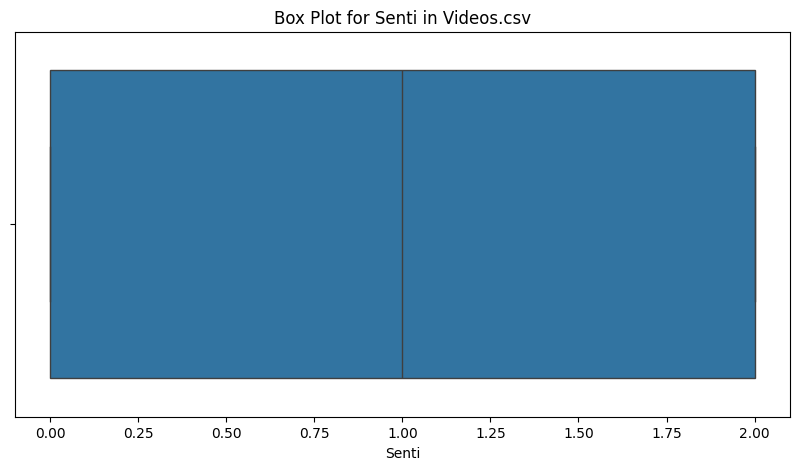

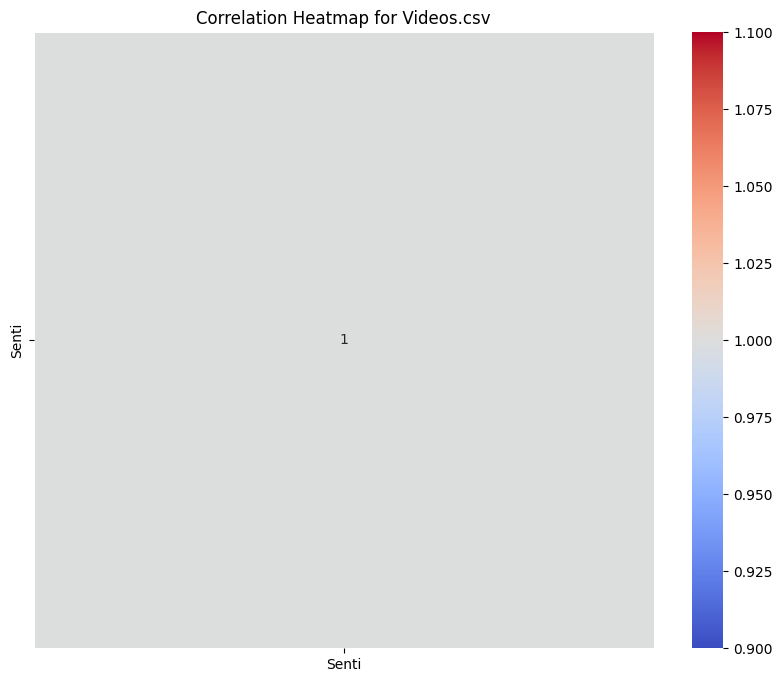

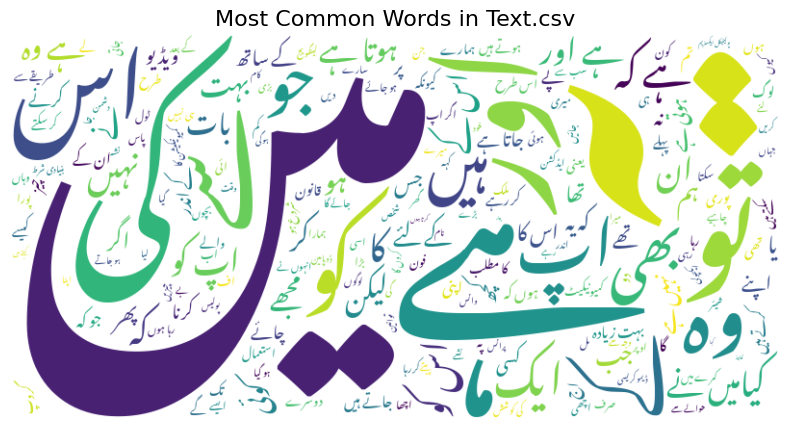

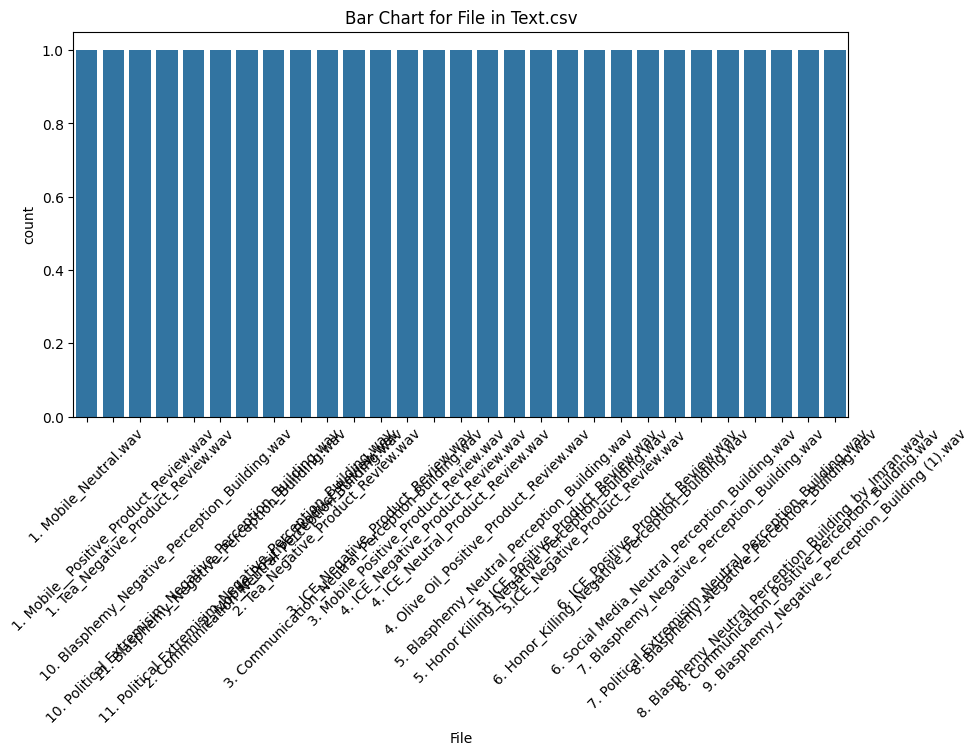

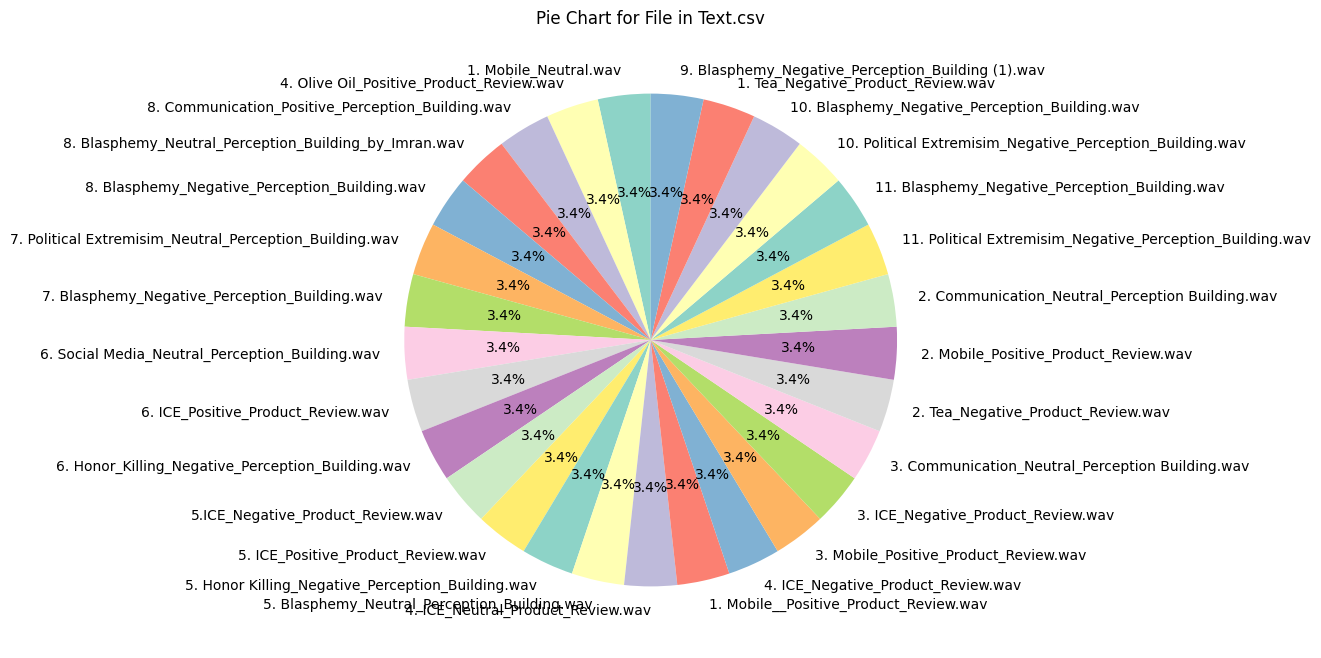

TypeError: unhashable type: 'list'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import os
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Path to the Validation Data folder
validation_data_folder = '/content/drive/MyDrive/work2/Validation_Data/Meta_Data'

# List of CSV files to specifically process for word clouds
target_files = ['Text.csv', 'Audio.csv']

# Path to the already downloaded Nastaliq font
font_path = '/content/NotoNastaliqUrdu-Regular.ttf'

# Download the Noto Nastaliq Urdu font if not already available
if not os.path.exists(font_path):
    font_url = 'https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoNastaliqUrdu/NotoNastaliqUrdu-Regular.ttf?raw=true'
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded Noto Nastaliq Urdu font to {font_path}")

# Function to generate basic statistics for a given DataFrame
def generate_basic_stats(df):
    stats = {
        'Number of Entries': len(df),
        'Number of Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().sum(),
        'Duplicated Rows': df.duplicated().sum()
    }
    return stats

# Function to generate detailed statistics for a given DataFrame
def generate_detailed_stats(df):
    detailed_stats = df.describe(include='all').transpose().to_dict()
    detailed_stats['unique_value_counts'] = {col: df[col].nunique() for col in df.columns}
    return detailed_stats

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    words = text.split()
    return words

# Function to generate word cloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Function to plot bar chart for categorical data
def plot_bar_chart(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to plot histogram for numerical data
def plot_histogram(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(title)
    plt.show()

# Function to plot pie chart for categorical data
def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
    plt.title(title)
    plt.ylabel('')
    plt.show()

# Function to plot box plot for numerical data
def plot_box_plot(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=column)
    plt.title(title)
    plt.show()

# Function to plot heatmap for correlation
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title(title)
        plt.show()
    else:
        print(f"No numeric columns to plot heatmap for {title}")

# Dictionary to hold statistics for each CSV file
stats_dict = {}

# Dictionary to hold unique words and their frequencies for each target CSV file
unique_words_dict = {}

# Process each CSV file
for csv_file in os.listdir(validation_data_folder):
    if csv_file.endswith('.csv'):
        file_path = os.path.join(validation_data_folder, csv_file)
        df = pd.read_csv(file_path)
        basic_stats = generate_basic_stats(df)
        detailed_stats = generate_detailed_stats(df)
        stats_dict[csv_file] = {**basic_stats, **detailed_stats}

        if csv_file in target_files:
            # Analyze the 'Transcription' column for unique words and their frequencies
            all_words = []
            df['Transcription'] = df['Transcription'].astype(str)
            df['Transcription'] = df['Transcription'].apply(clean_and_tokenize)
            for words in df['Transcription']:
                all_words.extend(words)

            word_counts = Counter(all_words)
            unique_words_dict[csv_file] = word_counts.most_common()

            # Generate word cloud for the most common words
            generate_wordcloud(all_words, f"Most Common Words in {csv_file}")

        # Generate visualizations for specific columns
        for col in df.columns:
            if df[col].dtype == 'object':
                plot_bar_chart(df, col, f'Bar Chart for {col} in {csv_file}')
                plot_pie_chart(df, col, f'Pie Chart for {col} in {csv_file}')
            elif df[col].dtype in ['int64', 'float64']:
                plot_histogram(df, col, f'Histogram for {col} in {csv_file}')
                plot_box_plot(df, col, f'Box Plot for {col} in {csv_file}')

        # Generate heatmap for numerical columns
        plot_heatmap(df, f'Correlation Heatmap for {csv_file}')

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index')

# Display the statistics
print(stats_df)

# Save the statistics to a CSV file
stats_output_path = '/content/drive/MyDrive/work2/Validation_Data/Validation_Data_Stats.csv'
stats_df.to_csv(stats_output_path)

print(f"Statistics saved to {stats_output_path}")

# Save unique words statistics to a CSV file
unique_words_df = pd.DataFrame.from_dict(unique_words_dict, orient='index').transpose()
unique_words_output_path = '/content/drive/MyDrive/work2/Validation_Data/Unique_Words_Stats.csv'
unique_words_df.to_csv(unique_words_output_path, index=False)

print(f"Unique words statistics saved to {unique_words_output_path}")
